In [1]:
import nltk
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from preprocess.normalize_sentences import SentenceNormalizer
%matplotlib inline

DATA_PATH = '../../data/'
OUTPUT_PATH = os.path.join(DATA_PATH, 'final')

if not os.path.exists(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)

def word_count(sent):
    return len(sent.split(' '))


def save_dataset(df, file_name):
    final_path = os.path.join(OUTPUT_PATH, file_name)
    df.to_csv(final_path, index=False, encoding='utf-8', sep='\t',
              columns=['sentence_normalized', 'label'],
              header=['sentence', 'label'])


## Prepare MTurk data

In [2]:
mturk_file = os.path.join(DATA_PATH, 'mturk/results_12.06.17.csv')

# Load data
mturk_df = pd.read_csv(mturk_file, usecols=['Input.sentence', 'Answer.categories'])
mturk_df.columns = ['sentence', 'label']
mturk_df['label'] = mturk_df['label'].map({'category 2': 'subjective', 'category 1': 'objective', 'category 3': 'subjective'})
print('Total number of sentences in mturk:', len(mturk_df.index))
mturk_df.head(10)


Total number of sentences in mturk: 4999


,sentence,label
0,I have wrestled the bears of tax burdens and o...,subjective
1,"At times^ the contact was ""rough to the point ...",objective
2,Not me^ Angela Merkel!,subjective
3,One that largely hasn't^ at least in any pract...,subjective
4,The memo identifies seven main areas of progra...,objective
5,At one point^ FBI sources said^ Abedin and Cli...,objective
6,This method allows researchers to transmit an ...,objective
7,Eating disorders^ which affect approximately 2...,objective
8,"""We have not found anything at this point that...",objective
9,The real danger wasnt if you played with it^ b...,subjective


## Prepare IMDB data

In [3]:
imdb_file = os.path.join(DATA_PATH, 'imdb/all.tsv')

# Load data
imdb_df = pd.read_csv(imdb_file, sep='\t', usecols=['sentence', 'file_name'])
imdb_df.columns = ['sentence', 'label']
imdb_df['label'] = imdb_df['label'].map({'subjective.txt': 'subjective', 'objective.txt': 'objective'})

print('Total number of sentences in imdb:', len(imdb_df.index))
imdb_df.sample(10)

Total number of sentences in imdb: 10367


,sentence,label
5170,the film is ultimately about as inspiring as a...,subjective
4639,after some time the son and daughter-in-law mu...,objective
5487,the mushy finale turns john q into a movie-of-...,subjective
10230,"if you like blood, guts and crazy beasts stalk...",subjective
7202,"its story about a young chinese woman, ah na, ...",subjective
6787,"though jones and snipes are enthralling, the m...",subjective
7113,this film can only point the way -- but thank ...,subjective
7899,what a pity ... that the material is so second...,subjective
3840,the story follows a university of texas profes...,objective
3454,holmes</a> was the worlds best known male acto...,objective


## Prepare Wiki data

In [4]:
wiki_file = os.path.join(DATA_PATH, 'wiki/all.tsv')

# Load data
wiki_df = pd.read_csv(wiki_file, sep='\t', usecols=['sentence', 'file_name'])
wiki_df.columns = ['sentence', 'label']
wiki_df['label'] = wiki_df['label'].map({'subjective.txt': 'subjective', 'objective.txt': 'objective'})

print('Total number of sentences in wiki:', len(wiki_df.index))
wiki_df.sample(10)

Total number of sentences in wiki: 646


,sentence,label
390,Proponents of Ethnic studies feel that this is...,objective
642,He was a Russian representative at the wedding...,subjective
14,"Memory boards for the Altair line included 1K,...",objective
625,"Like many outstanding artists of her time, Bas...",subjective
182,"Fishing and tourism occupy many people, especi...",objective
48,The new manufacturing line had a few serious p...,objective
133,The story of Math Invaders takes off as the hu...,objective
199,Augustine is traditionally credited with bring...,objective
612,"She is usually portrayed with a red-hued face,...",subjective
273,These units are still in very good condition w...,objective


In [5]:
custom_file = os.path.join(DATA_PATH, 'custom/all.tsv')

# Load data
custom_df = pd.read_csv(custom_file, sep='\t', usecols=['sentence', 'file_name'])
custom_df.columns = ['sentence', 'label']
custom_df['label'] = custom_df['label'].map({'subjective.txt': 'subjective', 'objective.txt': 'objective'})

print('Total number of sentences in custom:', len(custom_df.index))
custom_df.sample(10)

Total number of sentences in custom: 896


,sentence,label
762,This is a very awful hand.,subjective
314,A lot is a lot.,objective
281,A woman is a woman.,objective
680,This is a very silly education.,subjective
255,That is the door.,objective
787,This is a very silly place.,subjective
664,This number is very best.,subjective
344,A kid is a kid.,objective
678,This family is very stupid.,subjective
539,This question is very awful.,subjective


## Combine MTurk, IMDB, Wiki, and Custom, clean, then save

In [7]:
all_df = mturk_df.append(imdb_df).append(wiki_df).append(custom_df)

# Normalize the sentences
sent_normalizer = SentenceNormalizer(discarded_tokens=['[', ']'])
all_df['sentence_normalized'] = sent_normalizer.fit_transform(all_df['sentence'])

# Remove short sentences
all_df = all_df[all_df['sentence_normalized'].map(word_count) >= 3]
# Remove long sentences

def cut_off(sent):
    return ' '.join(sent.split()[:60])

all_df['sentence_normalized'] = all_df['sentence_normalized'].map(cut_off)

all_df = all_df.reset_index()

print('Total number of sentences:', len(all_df.index))
all_df.sample(20)

Total number of sentences: 16769


,index,sentence,label,sentence_normalized
12200,7309,an artful yet depressing film that makes a mel...,subjective,an artful yet depressing film that makes a mel...
4543,4619,"""I just think the whole idea is just messed up...",subjective,`` I just think the whole idea is just messed ...
2930,2973,Kim is also believed to have led a purge that ...,subjective,Kim is also believed to have led a purge that ...
3505,3559,However^ just on the basis of your description...,subjective,However just on the basis of your description ...
11467,6572,"however, its sins are forgivably venial, becau...",subjective,however its sins are forgivably venial because...
596,601,But I have come to appreciate how good an ice ...,subjective,But I have come to appreciate how good an ice ...
11020,6122,a continually fascinating exploration of the p...,subjective,a continually fascinating exploration of the p...
12465,7574,does anyone much think the central story of br...,subjective,does anyone much think the central story of br...
9744,4833,a young man in his early early 20's discovers ...,objective,a young man in his early early <NUM> 's discov...
16734,861,This face is very awful.,subjective,This face is very awful


In [8]:
# Save to file
save_dataset(all_df, "final.tsv")

## Dataset statistics

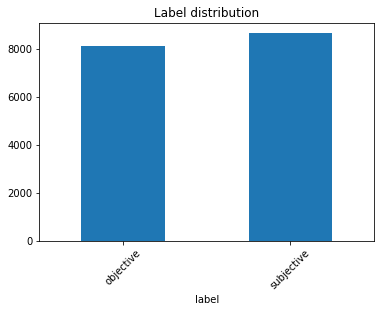

In [9]:
count_label = all_df.groupby(['label']).count().sentence_normalized
count_label.plot(kind='bar', rot=45, title="Label distribution")
# print(count_label['other'])

Average number of words in each sentence: 20.3

Number of word in shortest sentence: 3
<NUM> in <NUM>

Number of word in longest sentence: 60
The vast majority of those who received Tuesday afternoons robocall -perhaps out of fear of nuclear annihilation- didnt stay on the line long enough to find out that the call had been paid for by Ted Cruz for President and according to the Texas senators campaign manager was meant to merely warn voters of the dangers of a Trump presidency


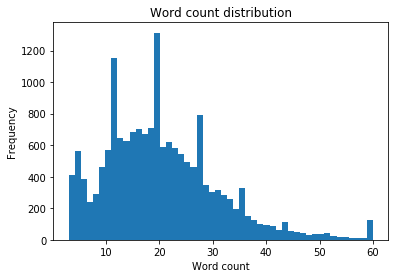

In [10]:
word_count_in_sentence = all_df['sentence_normalized'].map(word_count)
ax = word_count_in_sentence.plot.hist(bins=50, title="Word count distribution")
ax.set_xlabel("Word count")
print('Average number of words in each sentence: %.1f' % word_count_in_sentence.mean())
print()

print('Number of word in shortest sentence:', word_count_in_sentence.min())
print(all_df['sentence_normalized'][word_count_in_sentence.idxmin()])
print()

print('Number of word in longest sentence:', word_count_in_sentence.max())
print(all_df['sentence_normalized'][word_count_in_sentence.idxmax()])

## Dataset splitting

In [11]:
SEED = 23

test_size = 0.1
val_size  = 0.1

train_df, test_df = train_test_split(all_df, test_size=test_size, random_state=SEED)
train_df, val_df  = train_test_split(train_df, test_size=val_size / (1 - test_size), random_state=SEED)

print('Train size:', len(train_df.index))
print('Val size:', len(val_df.index))
print('Test size:', len(test_df.index))

save_dataset(train_df, "final.train.tsv")
save_dataset(val_df, "final.val.tsv")
save_dataset(test_df, "final.test.tsv")

Train size: 13415
Val size: 1677
Test size: 1677
